# Project: Investigate a Dataset (IMDB - Movies rating success)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I will focus on rating. 
    1. What is average rating for movies? 
    2. Which movies are better? 
    3. Are old movies better? 
    4. Are expensive movies better? 
    5. Who is the director with the highest rating?

For my "Rating movies success" analyse I decided use 4 basic libraries as pandas, numpy, matplotlib and seaborn.

In [4]:
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

<a id='wrangling'></a>
## Data Wrangling

### Comment:
>I worked on localhost jupyter notebook. I downloaded data from cloudfront.net in csv format after that read them by panda library.

In [5]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Comment:
>Almost all date types looks good, but in cleaning phase I'll decide what can I improve.

In [6]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Comment:
>Few columns have missing rows, but it doesn't look important.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

AttributeError: 'NoneType' object has no attribute 'to_frame'

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Comment:
>Rating has a normal distribution, I will try to find out which movies have the best rating.

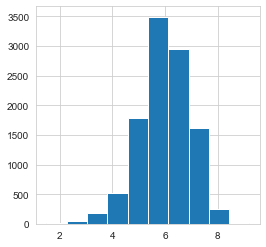

In [11]:
df['vote_average'].hist(figsize=(4,4));

### Comment:
>We don't have NULL values in budget or revenue columns but I have many rows with 0 value. In next phase I'll see if I change zero rows with mean or delete them, but it is too many of them. 

In [12]:
df['budget'][df['budget']==0].count(),df['revenue'][df['revenue']==0].count()

(5696, 6016)

## Cleaning: 
>I dropped some columns, which don't need my analysis.

In [13]:
df.drop(['keywords','tagline'], axis=1, inplace=True)

### Comment: Cleaning
>I added new columns. I wanna check which decade has best rating movies.

In [14]:
dec = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
dec_name = ['1960s', '1970s','1980s','1990s','2000s','2010s']

In [15]:
df['decade'] = pd.cut(df['release_year'], dec, labels=dec_name)

## Research Question 1 (Vote rating for old and new movies by decades)

In [16]:
df_d = df.groupby('decade').vote_average.mean()

In [17]:
df_d

decade
1960s    6.258221
1970s    6.333945
1980s    6.063653
1990s    5.985376
2000s    5.932444
2010s    5.888896
Name: vote_average, dtype: float64

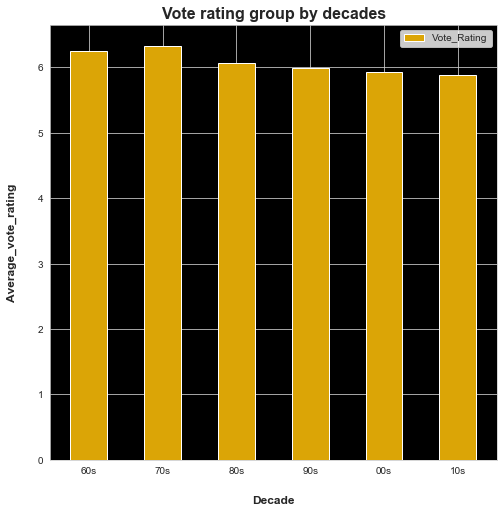

In [18]:
labels = ['60s', '70s', '80s', '90s', '00s', '10s']
decade_vote = df_d

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 8))
rects1 = ax.bar(x, decade_vote, width, label='Vote_Rating', color='#DBA506')

ax.set_facecolor('black')
ax.set_xlabel('Decade',labelpad=20, weight='bold', size=12)
ax.set_ylabel('Average_vote_rating',labelpad=20, weight='bold', size=12)
ax.set_title('Vote rating group by decades', weight='bold', size=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

### Comment:
>I decided to check if old movies are better than new movies. 
1. I divided years to decades.
2. I made mean for every decade vs. vote rating.
3. I made a bar chart. I wanted to use the colors of IMDB, which is yellow mustard for logo and black background. Maybe no bar chart looks a little bit dark.
4. **Conclusion**: The quality of movies is going down a little bit, but in general it doesn't matter if movies are old or new. The average rating for movies is almost the same.

### Research Question 2  (Are expensive movies better rated than cheap one?)

### Comment:
>I created new dataframe where I removed all rows where budget was zero. I was thinkink about replace them with mean, but many times these movies were really bad and actual budget had to be much lower than mean. <br>Budget values are really big numbers, so I added one more column where budget is in milions. It will be better for readibility.

In [19]:
df['budget_in_mil'] = df.budget / 1000000

In [20]:
budget_div = [0.000001, 6, 17, 40, 425]
bin_names = ['cheap<6M', 'medium<17M', 'expensive<40', 'most_expensive>40']

In [21]:
df['money_level'] = pd.cut(df['budget_in_mil'], budget_div, labels=bin_names)

In [22]:
df_budget = df[df['budget']!=0]

In [23]:
df_budget.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_in_mil
count,5170.000000,5170.000000,5.170000e+03,5.170000e+03,5170.000000,5170.000000,5170.000000,5170.000000,5.170000e+03,5.170000e+03,5170.000000
mean,45513.083366,0.992323,3.073943e+07,8.027566e+07,107.093230,408.593424,6.032108,2001.252805,3.688774e+07,1.021757e+08,30.739433
std,72723.324150,1.329145,3.890065e+07,1.594749e+08,22.808798,788.249398,0.884156,11.775932,4.195701e+07,1.959055e+08,38.900652
min,5.000000,0.001117,1.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00,0.000001
25%,8840.500000,0.348024,6.000000e+06,0.000000e+00,93.000000,35.250000,5.500000,1996.000000,8.102293e+06,0.000000e+00,6.000000
50%,13010.000000,0.623921,1.700000e+07,2.100078e+07,103.000000,122.000000,6.100000,2005.000000,2.272271e+07,2.853699e+07,17.000000
75%,44935.250000,1.152401,4.000000e+07,8.942473e+07,117.000000,402.000000,6.600000,2010.000000,5.007483e+07,1.133573e+08,40.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,425.000000


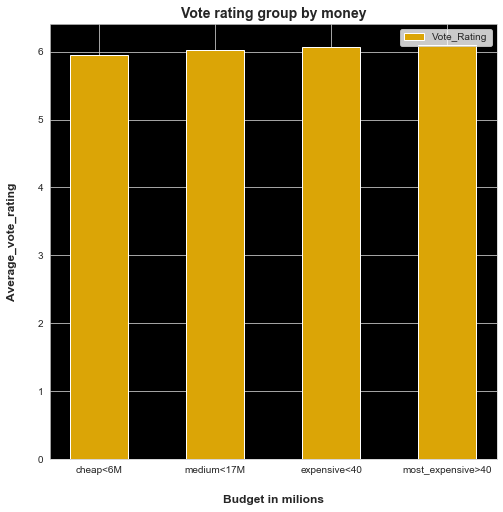

In [24]:
labels = bin_names
money = df_budget.groupby('money_level').mean().vote_average

x = np.arange(len(labels))  # the label locations
width = 0.5  

fig, ax = plt.subplots(figsize=(8, 8))
rects1 = ax.bar(x, money, width, label='Vote_Rating', color='#DBA506')

ax.set_facecolor('black')
ax.set_ylabel('Average_vote_rating', labelpad=20, weight='bold', size=12)
ax.set_xlabel('Budget in milions', labelpad=20, weight='bold', size=12)
ax.set_title('Vote rating group by money', weight='bold', size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper right');

### Comment:
>I decided to check if expensive movies are better than cheap movies. 
1. I divided movies to 4 categories min, 25%, 50%, 75%, max budget values .
2. I made mean for every price group vs. vote rating.
3. I made a bar chart same as question before - same color, etc.
4. **Conclusion**: The rating / price of movies is stable. We can not say that more expensvie movies have better rating.

# Looking for an answer

### Comment
>In last section I tried one more time find what kind of movies have better rating. I divided movies in two categories. One where is rating 6+ which is more than mean and second category 6-.

In [25]:
df_budget[df_budget['budget_in_mil'] > 300]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,overview,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade,budget_in_mil,money_level
2244,46528,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,An Asian assassin (Dong-gun Jang) is forced to...,...,Boram Entertainment Inc.,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07,2000s,425.0,most_expensive>40
3375,1865,tt1298650,4.95513,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,http://disney.go.com/pirates/index-on-stranger...,Rob Marshall,Captain Jack Sparrow crosses paths with a woma...,...,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08,2010s,380.0,most_expensive>40


### Comment:
> I created a function where you can easily change the independent variable and you will see it against the dependent variable which is all the time rating. I decided again used the colors of IMDB.

In [26]:
def plt_func(colname):
    ax = df_budget[colname][df_budget['vote_average'] <6].hist(alpha=0.9, bins = 20, label='Rating 6-', figsize=(4,4), color='#DBA506') 
    ay = df_budget[colname][df_budget['vote_average'] >=6].hist(alpha=0.5, bins = 20, label='Rating 6+', figsize=(4,4), color='black')
    ax.set_title("{} vs Rating".format(colname.capitalize()), weight='bold', size=16)
    ax.set_xlabel(colname, labelpad=20, weight='bold', size=12)
    ax.set_ylabel("Number of movies", labelpad=20, weight='bold', size=12)
    plt.legend();

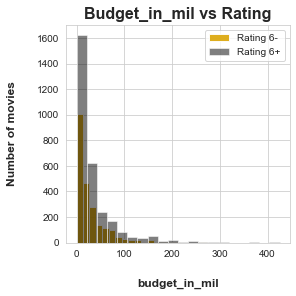

In [27]:
plt_func('budget_in_mil')

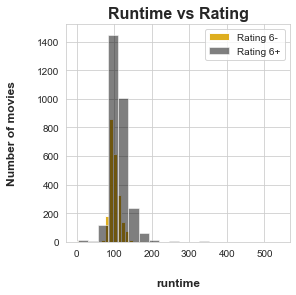

In [28]:
plt_func('runtime')

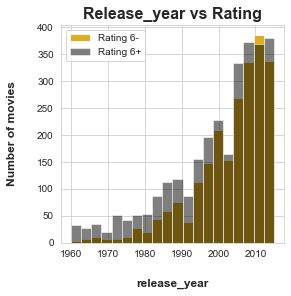

In [29]:
plt_func('release_year')

In [30]:
df.groupby('director').mean().vote_average.nlargest(5).to_frame()

,vote_average
director,
Mark Cousins,9.2
Derek Frankowski,8.8
David Mallet,8.7
Curt Morgan,8.5
James Payne,8.5


## Limitations

>In general, the data frame was pretty clean and there was a lot of information. On the other hand, when I analyze it closer I found out many values in budget or revenue columns have value 0. It is different than null. You can find null easy with *df.info()*, also in the histogram, I did not see 0 values, because in this case budget/revenue were sometimes really high (hundred millions of dollars). You can easily lose it in a histogram, because 0 and 1 million are really close.
<br>After all, I had to remove 0 values, but I didn't have to change my analyze, because there was still a lot of information for my work.
<br>Also I had many questions for a dataset. Which director has the biggest budget for movies, revenue from the movie, or which company, but I didn't wanna lose focus on my main goal. What is the main success for the highest rate.

<a id='conclusions'></a>
## Conclusions

>After my last histogram I couldn't find solutions and decided what is main reason for better rated movies. I had in each group outliers but it wasn't so significant, so I let them go and include them to histograms. I think it will be next lesson "Practical Statistic" where I will learn working with outliers.
<br>After long analyzing I can say only one. If you wanna have a better rating movie you do not have to spend a lot of money. Also, there is no guaranty for a better rating if the movie is new and has long runtime. 
<br>So maybe you need only the best director and let him do his job if you want the highest-rated movie in IMDB rank. 